### Package import

In [42]:
import warnings
warnings.simplefilter(action='ignore',)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from time import time
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import multiprocessing as mp

from multiprocessing import Queue
#from Queue import Queue
from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel


In [9]:
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=128)
sns.set_style("darkgrid")
print("Number of cpu : ", mp.cpu_count())

Number of cpu :  4


### Dataset Gernerate

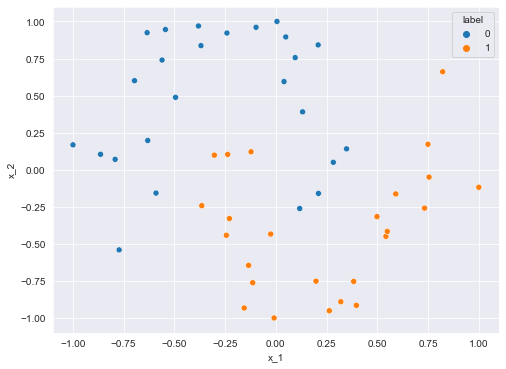

In [11]:
X,y = datasets.make_moons(n_samples=50, noise=0.2, random_state=10)

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 10,test_size=1/5)

plt.figure(figsize=(8,6))
data_df = pd.DataFrame(dict(x_1=X[:,0], x_2=X[:,1], label=y))
sns.scatterplot('x_1', 'x_2', data=data_df, hue='label')
plt.show()

### Circuit Generate

In [12]:
def generate_circuit_2local(genes, qubit, parameter):
    i, q = 0, 0
    qc_r, qc_h, qc_cnot = 0, 0, 0
    qc = QuantumCircuit(qubit)
    p = ParameterVector('p', parameter)
    
    for i in range(parameter): qc.rz(0*p[i],i % qubit)   
    
    for gene in genes:   
        if gene[0] == 0 and gene[1] == 0 and gene[2] == 0:
            qc.h(q % qubit)
            qc_h+=1

        elif gene[0] == 0 and gene[1] == 0 and gene[2] == 1:
            qc.cx(q % qubit, (q+1) % qubit)
            qc_cnot+=1

        elif gene[0] == 1 and gene[1] == 0 and gene[2] == 1:
            
            
            
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.rx(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.rx((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.rx((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.rx((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.rx((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.rx((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.rx((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.rx((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
        elif gene[0] == 1 and gene[1] == 1 and gene[2] == 0:
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.ry(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.ry((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.ry((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.ry((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.ry((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.ry((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.ry((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.ry((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1

        elif gene[0] == 1 and gene[1] == 1 and gene[2] == 1:
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 0: 
                qc.rz(np.pi*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 0 and gene[5] == 1: 
                qc.rz((7*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 0:
                qc.rz((3*np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 0 and gene[4] == 1 and gene[5] == 1: 
                qc.rz((5*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 0:
                qc.rz((np.pi/2)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 0 and gene[5] == 1: 
                qc.rz((3*np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 0: 
                qc.rz((np.pi/4)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
            if gene[3] == 1 and gene[4] == 1 and gene[5] == 1: 
                qc.rz((np.pi/8)*p[i % parameter], q % qubit)
                i+=1
                qc_r+=1
        q+=1
    return qc, qc_r, qc_h, qc_cnot


### Parameters

In [18]:
MODE = "2local" 
QUBIT = 2
FEATURE = 2

BIT = 6
GENE = 8
POPULATION = multiprocessing.cpu_count() # 8

POOLSIZE = 3
OFFSPRINGSIZE = POPULATION - POOLSIZE
PROB = 6
MUTATION_PROB = PROB/GENE

GENERATION = 100
EARLYSTOP = 10

#### Multi-objective fitness function


In [19]:
W = 20

def cost_func(acc, r, h, cnot, swap=0):
    
    if acc == 0.0: acc = 0.01
    gate_cost = r + 2*h + 5*cnot+11*swap
    fit = gate_cost + W / acc**2 - W
    return round(fit,1)

def cost_gate(r,h,cnot,swap=0): return r+2*h+5*cnot+11*swap

In [20]:
def task(i, pop, q, mode):
    if mode == "2local": qc_i, r_i, h_i, cnot_i = generate_circuit_2local(pop[i], QUBIT, FEATURE)
    kernel = QuantumKernel(feature_map=qc_i, quantum_instance=quantum_instance,)
    model = SVC(kernel=kernel.evaluate)
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    if mode == "2local": q.put([score, r_i, h_i, cnot_i])

In [21]:
def calculate_fitness(pop, population, train_x, train_y, test_x, test_y):
    FITNESS = []
    SCORE, RR, HH, CC = [], [], [], []

    for i in range(population):
        qc_i, r_i, h_i, cnot_i = generate_circuit_2local(pop[i], QUBIT, FEATURE)
        kernel = QuantumKernel(feature_map=qc_i, quantum_instance=quantum_instance,)
        model = SVC(kernel=kernel.evaluate)
        model.fit(train_x, train_y)
        score = model.score(test_x, test_y)
        
        SCORE.append(score)
        QC_R.append(r_i)
        QC_H.append(h_i)
        QC_CNOT.append(cnot_i)

    for i in range(population):
        fit = cost_func(SCORE[i], QC_R[i], QC_H[i], QC_CNOT[i])
        FITNESS.append(fit)
    
    return SCORE, FITNESS, QC_R, QC_H, QC_CNOT

### Genetic Algorithm

POPULATION:  4
[<Process name='Process-73' parent=23231 initial>]
[<Process name='Process-73' pid=50583 parent=23231 started>, <Process name='Process-74' parent=23231 initial>]
[<Process name='Process-73' pid=50583 parent=23231 started>, <Process name='Process-74' pid=50584 parent=23231 started>, <Process name='Process-75' parent=23231 initial>]
[<Process name='Process-73' pid=50583 parent=23231 started>, <Process name='Process-74' pid=50584 parent=23231 started>, <Process name='Process-75' pid=50585 parent=23231 started>, <Process name='Process-76' parent=23231 initial>]
stuck1
[<multiprocessing.queues.Queue object at 0x13a6a5280>, <multiprocessing.queues.Queue object at 0x13c122850>, <multiprocessing.queues.Queue object at 0x13c22f4c0>, <multiprocessing.queues.Queue object at 0x13c22f7c0>]
stuck2
[]


IndexError: list index out of range

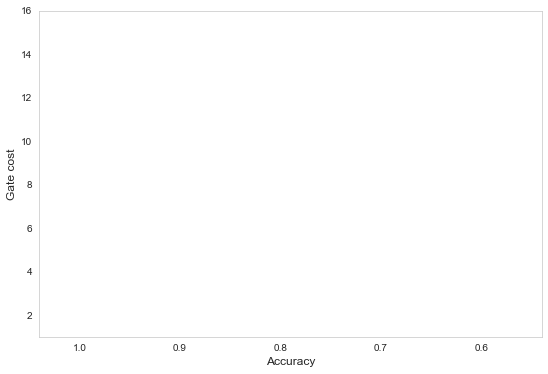

In [55]:
from multiprocessing import Process, Pool
pop, COST, obj_GATE, obj_ACC= [], [], [], []
early_stop, threshold= 0, 100

sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
plt.xlim(1.04,0.54)
plt.ylim(1,GENE*2)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Gate cost", fontsize=12)
plt.grid(False)

    
for i in range(POPULATION):
    genes = np.random.randint(2, size=(GENE,BIT))
    pop.append(genes)
    
start_time = time()
for g in range(GENERATION):
    
    FITNESS, SCORE, QC_R, QC_H, QC_CNOT, QC_SWAP, plt_acc, plt_gate = [], [], [], [], [], [], [], []
    cost_pool ,obj_gate, obj_acc = 0, 0, 0
    
    ##### Don't use if you don't have multiple CPU #####
    #'''
    #pool = Pool(mp.cpu_count())
    
    inputs = range(POPULATION)
    print("POPULATION: ", POPULATION)
    process_list= []
    #from multiprocessing.queues import SimpleQueue
    #from multiprocessing import get_context
    #q_list = Queue(POPULATION)
    q_list = [Queue() for i in range(len(inputs))]
    #q_list = [Queue() for i in range(len(inputs))]
    RESULt = []

    for i in inputs:
        process_list.append(mp.Process(target = task, args = (i, pop,  q_list[i], MODE)))
        print(process_list)
        process_list[-1].start()
    
    #from multiprocessing.queues import SimpleQueue

    for i in inputs:
        process_list[i].join()
    print("stuck1")

    print(q_list)
    for q in q_list:
        print(q)
        #queue_output = q.get_nowait()
        if q.empty(): continue
        RESULt.append(q.get())
        
    print("stuck2")
    print(RESULt)
    end_time = time()

    for i in range(POPULATION):
        SCORE.append(round(RESULt[i][0],2))
        QC_R.append(RESULt[i][1])
        QC_H.append(RESULt[i][2])
        QC_CNOT.append(RESULt[i][3])
        
    for i in range(POPULATION):
        fit = cost_func(SCORE[i], QC_R[i], QC_H[i], QC_CNOT[i])
        FITNESS.append(fit)
    ##### Don't use if you don't have multiple CPU #####
    ##### Run line below instead
    #'''
    #SCORE, FITNESS, QC_R, QC_H, QC_CNOT= calculate_fitness(pop, POPULATION, train_x, train_y, test_x, test_y)
    #end_time = time()  
    ##### Run line above instead
    
    for i in range(POOLSIZE):
        cost_p = FITNESS[i]
        obj_g = cost_gate(QC_R[i], QC_H[i], QC_CNOT[i])
        obj_a = SCORE[i]
        
        plt_gate.append(obj_g)
        plt_acc.append(obj_a)
        cost_pool += cost_p
        obj_gate += obj_g
        obj_acc += obj_a
     
    if cost_pool/POOLSIZE < threshold:
        threshold = cost_pool/POOLSIZE
        early_stop = 0
    early_stop += 1
    
    COST.append(cost_pool/POOLSIZE)
    obj_GATE.append(obj_gate/POOLSIZE)
    obj_ACC.append(obj_acc/POOLSIZE)
    plt.scatter(plt_acc, plt_gate, s=10, c="#4863A0", alpha=(g+GENERATION/2)/(1.5*GENERATION))
    
    print("\nGeneration:", g+1,", Cost:", round(COST[g],2) ,", Time:", round(end_time-start_time,2),"s")
    print("Accuracy:", SCORE)
    print("Fitness:", FITNESS)

    if g == GENERATION: break
    if early_stop == EARLYSTOP: break

    parents = []

    for i in range(POOLSIZE):
        FitnessIndex = np.where(FITNESS == min(FITNESS))
        parents.append(pop[FitnessIndex[0][0]])
        del FITNESS[FitnessIndex[0][0]]
        del pop[FitnessIndex[0][0]]

    for i in range(OFFSPRINGSIZE):
        ll,rr = np.random.randint(POOLSIZE), np.random.randint(POOLSIZE) 
        parent_left, parent_right = parents[ll], parents[rr]
        cross_point = np.random.randint(GENE-1) 
        offspring = np.concatenate((parent_left[:cross_point],parent_right[cross_point:]), axis=0)

        for ii in range(PROB):
            mutation_index = np.random.randint(GENE) 
            mutation_bit = np.random.randint(BIT) 
            offspring[mutation_index][mutation_bit] = (offspring[mutation_index][mutation_bit]+1)%2

        parents.append(offspring)       
    pop = parents    
plt.show()

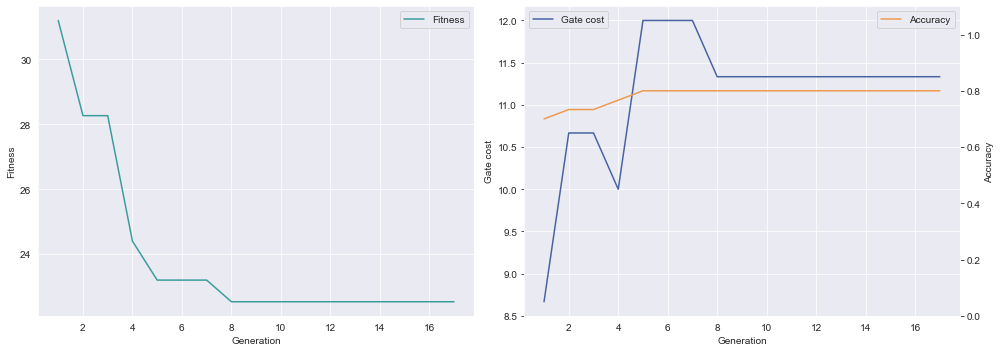

In [23]:
sns.set_style("darkgrid")
obj_x, obj_y1, obj_y2 = np.arange(len(obj_ACC)), np.array(obj_GATE), np.array(obj_ACC)
cost_x, cost_y = np.arange(len(obj_GATE)), np.array(COST)

fig, axes = plt.subplots(1,2, figsize=(14,5))

ax1=axes[1]
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gate cost')
ax1.plot(obj_x+1, obj_y1, label="Gate cost", color="#4863A0")
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('Accuracy')
ax2.plot(obj_x+1, obj_y2, label="Accuracy", color="#EE9A4D")
ax2.grid(False)
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.1)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

ax3=axes[0]
ax3.set_xlabel('Generation')
ax3.set_ylabel('Fitness')
ax3.plot(cost_x+1, cost_y, label="Fitness", color="#3B9C9C")
ax3.tick_params(axis='y')
ax3.legend(loc = "upper right")

fig.tight_layout() 
plt.show()

### Results

R gate: 4 
H gate: 0 
CNOT gate: 1


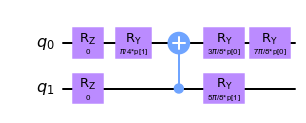

In [24]:
DISPLAY = 1
qc_display, r_display, h_display, cnot_display = generate_circuit_2local(pop[DISPLAY-1], QUBIT, FEATURE)
print("R gate:",r_display,"\nH gate:",h_display,"\nCNOT gate:",cnot_display)
qc_display.draw(output="mpl")


In [25]:
ga_kernel = QuantumKernel(feature_map=qc_display, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 0.8


### Compare kernels

In [26]:
GRID = 0.04

def make_meshgrid(x, y, h=0.004):
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+0.004, h), np.arange(-1.04, 1.04+0.004, h))
    return xx, yy

sns.set_style("whitegrid")
def make_big_meshgrid(x, y, h=GRID): 
    xx, yy = np.meshgrid(np.arange(-1.04, 1.04+GRID, h), np.arange(-1.04, 1.04+GRID, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)
bbxx, bbyy = make_big_meshgrid(X0, X1)

meshgrid_features = np.column_stack((xx.ravel(), yy.ravel()))
bbmeshgrid_features = np.column_stack((bbxx.ravel(), bbyy.ravel()))

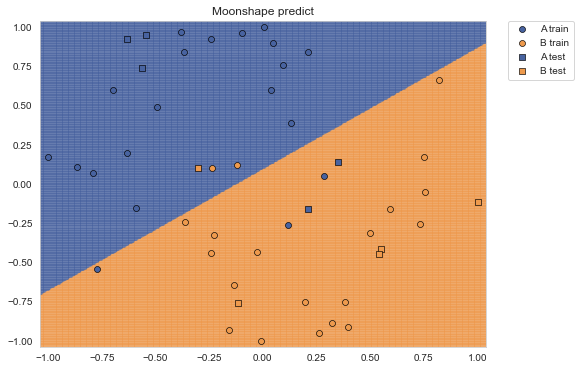

SVM linear test score: 0.7


In [27]:
model_svc = SVC(kernel='linear')
svc_l = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_l.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.36)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'SVM linear test score: {score}')

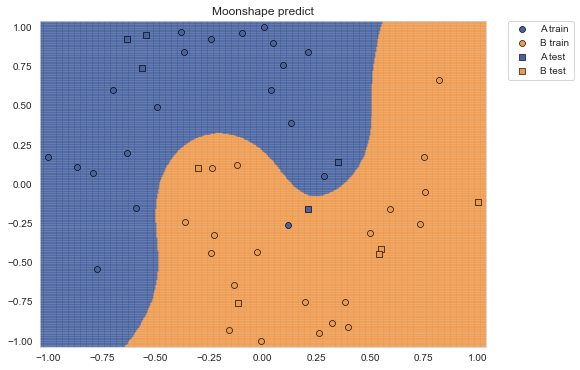

SVM Gaussian test score: 0.9


In [28]:
model_svc = SVC(kernel='rbf',gamma=5)
svc_p = model_svc.fit(train_x, train_y)
score = model_svc.score(test_x, test_y)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = svc_p.predict(meshgrid_features)

plt.figure(figsize=(8,6))
meshgrid_colors = meshgrid_colors.reshape(xx.shape)
plt.pcolormesh(xx, yy, meshgrid_colors, cmap=cmap, alpha=0.36)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'SVM Gaussian test score: {score}')

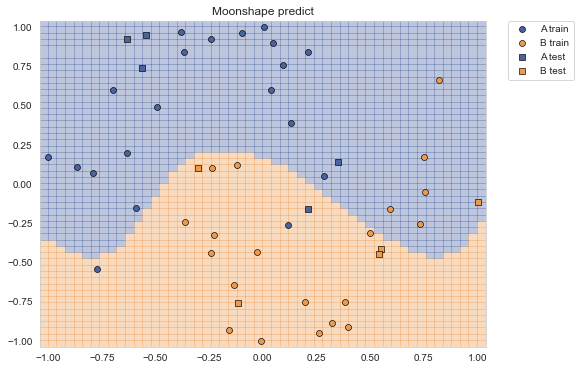

QSVM test score: 0.8
Cost time: 10.456039 s


In [29]:
X0, X1 = train_x[:, 0], train_x[:, 1]
bbxx, bbyy = make_big_meshgrid(X0, X1)
bbmeshgrid_features = np.column_stack((bbxx.ravel(), bbyy.ravel()))

meshgrid_time1 = time()

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4863A0","#EE9A4D"])
meshgrid_colors = qsvm.predict(bbmeshgrid_features)

plt.figure(figsize=(8,6))
plt.ylim(-1.04, 1.04)
plt.xlim(-1.04, 1.04)
meshgrid_colors = meshgrid_colors.reshape(bbxx.shape)
plt.pcolormesh(bbxx, bbyy, meshgrid_colors, cmap=cmap, alpha=0.36)

plt.scatter(
    train_x[np.where(train_y[:] == 0), 0], train_x[np.where(train_y[:] == 0), 1],
    marker="o", color="#4863A0", edgecolors="k", linewidths=0.64, label="A train")

plt.scatter(
    train_x[np.where(train_y[:] == 1), 0], train_x[np.where(train_y[:] == 1), 1],
    marker="o", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B train")

plt.scatter(
    test_x[np.where(test_y[:] == 0), 0], test_x[np.where(test_y[:] == 0), 1],
    marker="s", color="#4863A0", edgecolors="k", linewidths=0.64, label="A test")

plt.scatter(
    test_x[np.where(test_y[:] == 1), 0], test_x[np.where(test_y[:] == 1), 1],
    marker="s", color="#EE9A4D", edgecolors="k", linewidths=0.64, label="B test")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0.0)
plt.title("Moonshape predict")
plt.grid(False)
plt.show()

print(f'QSVM test score: {q_score}')

meshgrid_time2 = time()
print("Cost time: {:3f} s".format(meshgrid_time2-meshgrid_time1))